In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mushehta","key":"7d415f1b3d3c59c80eee85c5c0c547da"}'}

In [1]:
import shutil
shutil.rmtree("/content/sample_data")

## **connect to kaggle and download the data**

In [3]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d dschettler8845/brats-2021-task1

100% 12.3G/12.3G [04:40<00:00, 27.2MB/s]
100% 12.3G/12.3G [04:40<00:00, 47.0MB/s]


# unzip files

In [4]:
! unzip /content/brats-2021-task1.zip -d /content/data

Archive:  /content/brats-2021-task1.zip
  inflating: /content/data/BraTS2021_00495.tar  
  inflating: /content/data/BraTS2021_00621.tar  
  inflating: /content/data/BraTS2021_Training_Data.tar  


In [5]:
mkdir /content/data/train_data

In [6]:
!tar -xvf /content/data/BraTS2021_Training_Data.tar -C /content/data/train_data

./
./.DS_Store
./BraTS2021_00000/
./BraTS2021_00000/BraTS2021_00000_flair.nii.gz
./BraTS2021_00000/BraTS2021_00000_seg.nii.gz
./BraTS2021_00000/BraTS2021_00000_t1.nii.gz
./BraTS2021_00000/BraTS2021_00000_t1ce.nii.gz
./BraTS2021_00000/BraTS2021_00000_t2.nii.gz
./BraTS2021_00002/
./BraTS2021_00002/BraTS2021_00002_flair.nii.gz
./BraTS2021_00002/BraTS2021_00002_seg.nii.gz
./BraTS2021_00002/BraTS2021_00002_t1.nii.gz
./BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz
./BraTS2021_00002/BraTS2021_00002_t2.nii.gz
./BraTS2021_00003/
./BraTS2021_00003/BraTS2021_00003_flair.nii.gz
./BraTS2021_00003/BraTS2021_00003_seg.nii.gz
./BraTS2021_00003/BraTS2021_00003_t1.nii.gz
./BraTS2021_00003/BraTS2021_00003_t1ce.nii.gz
./BraTS2021_00003/BraTS2021_00003_t2.nii.gz
./BraTS2021_00005/
./BraTS2021_00005/BraTS2021_00005_flair.nii.gz
./BraTS2021_00005/BraTS2021_00005_seg.nii.gz
./BraTS2021_00005/BraTS2021_00005_t1.nii.gz
./BraTS2021_00005/BraTS2021_00005_t1ce.nii.gz
./BraTS2021_00005/BraTS2021_00005_t2.nii.gz
./Bra

In [32]:
import os
os.remove("/content/data/train_data/.DS_Store")


FileNotFoundError: ignored

In [43]:
dir = os.listdir("/content/data/train_data")
import shutil
for i in range(100):
  shutil.rmtree("/content/data/train_data/"+dir[i])


In [8]:
mkdir /content/data/val_data

In [9]:
import os
list_dir = os.listdir("/content/data/train_data")

import shutil

for i in range(50):
  src_path = "/content/data/train_data/" + list_dir[i]
  dst_path = r"/content/data/val_data"
  shutil.move(src_path, dst_path)



# New Section

In [ ]:
!pip install segmentation_models_3D
!pip install keras_applications

In [11]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
import os
import re
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
#import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random

scaler = MinMaxScaler()


# load image

In [122]:
def load_image(path):

    list_dir = os.listdir(path)
    regex = re.compile("(flair.nii.gz)$")
    idxs = [i for i, item in enumerate(list_dir) if re.search(regex, item)]
    img_f = nib.load(path +"/" +list_dir[idxs[0]])
    arr_f = (img_f.get_fdata())[56:184 , 56:184,13:141]
    
    regex = re.compile("(t1ce.nii.gz)$")
    idxs = [i for i, item in enumerate(list_dir) if re.search(regex, item)]
    img_t1ce = nib.load(path +"/" +list_dir[idxs[0]])
    arr_t1ce = (img_t1ce.get_fdata())[56:184 , 56:184,13:141]
    
    regex = re.compile("(t2.nii.gz)$")
    idxs = [i for i, item in enumerate(list_dir) if re.search(regex, item)]
    img_t2 = nib.load(path +"/" +list_dir[idxs[0]])
    arr_t2 = (img_t2.get_fdata())[56:184 , 56:184,13:141]
    
    regex = re.compile("(seg.nii.gz)$")
    idxs = [i for i, item in enumerate(list_dir) if re.search(regex, item)]
    img_seg = nib.load(path +"/" +list_dir[idxs[0]])
    arr_seg = (img_seg.get_fdata())[56:184 , 56:184,13:141]
    
    return arr_f , arr_t1ce , arr_t2 , arr_seg

# get image

In [13]:
def get_image(path):


    f_arr, t1ce_arr, t2_arr, seg_arr = load_image(path)
    f_arr=scaler.fit_transform(f_arr.reshape(-1, f_arr.shape[-1])).reshape(f_arr.shape)
    t1ce_arr=scaler.fit_transform(t1ce_arr.reshape(-1, t1ce_arr.shape[-1])).reshape(t1ce_arr.shape)
    t2_arr=scaler.fit_transform(t2_arr.reshape(-1, t2_arr.shape[-1])).reshape(t2_arr.shape)
    X = np.stack([f_arr , t1ce_arr ,t2_arr],  axis=3)
    
    
    y = seg_arr
    y = np.where(y == 4, 3, y)
    y = to_categorical(y, num_classes=4)
    
    return X,y

# load_img

In [14]:
def load_img(img_dir, img_list):
    images=[]
    msk = []
    for i, image_name in enumerate(img_list):  
        
      image, y = get_image(img_dir+image_name)
      images.append(image)
      msk.append(y)
    images = np.array(images)
    msk = np.array(msk)
    
    return(images , msk)

# imageLoader

In [15]:
def imageLoader(img_dir, img_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X ,  Y = load_img(img_dir, img_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

# call some lib

In [16]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam 
from keras.metrics import MeanIoU
import os

kernel_initializer =  'he_uniform'

# create model

In [17]:
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible. 
    
    return model




# test 

BraTS2021_00479_flair.nii.gz


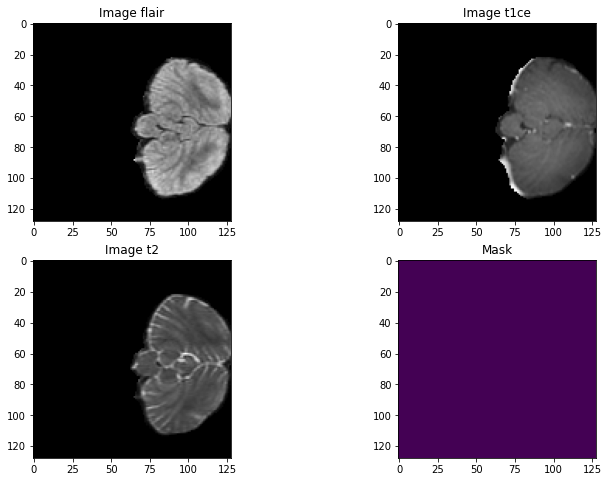

In [131]:
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

# train data

In [128]:
batch_size = 1

train_dir = r"/content/data/train_data/"
val_dir = r"/content/data/val_data/"
train_img_datagen = imageLoader(train_dir, os.listdir(train_dir), batch_size)

print(len(os.listdir(train_dir)))
val_img_datagen = imageLoader(val_dir, os.listdir(val_dir), batch_size)

134


In [47]:
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]
from tensorflow import keras 
LR = 0.0001
optim = keras.optimizers.Adam(LR)

In [48]:
steps_per_epoch = len(os.listdir(train_dir))//batch_size
val_steps_per_epoch = len(os.listdir(val_dir))//batch_size
print(steps_per_epoch)

67


In [49]:
model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

In [50]:
model.compile(optimizer = optim, loss=total_loss, metrics=metrics)

In [51]:
history=model.fit_generator(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=5,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


/content/data/train_data/BraTS2021_00251
/content/data/train_data/BraTS2021_00530
Epoch 1/5
/content/data/train_data/BraTS2021_00479
/content/data/train_data/BraTS2021_00237
 1/67 [..............................] - ETA: 7:28 - loss: 1.0266 - accuracy: 0.0777 - iou_score: 0.0017/content/data/train_data/BraTS2021_00020
/content/data/train_data/BraTS2021_00344
 2/67 [..............................] - ETA: 4:32 - loss: 1.0226 - accuracy: 0.0983 - iou_score: 0.0034/content/data/train_data/BraTS2021_00087
/content/data/train_data/BraTS2021_00419
 3/67 [>.............................] - ETA: 4:28 - loss: 1.0203 - accuracy: 0.1209 - iou_score: 0.0042/content/data/train_data/BraTS2021_00294
/content/data/train_data/BraTS2021_00325
 4/67 [>.............................] - ETA: 4:24 - loss: 1.0189 - accuracy: 0.1483 - iou_score: 0.0039/content/data/train_data/BraTS2021_00466
/content/data/train_data/BraTS2021_00799
 5/67 [=>............................] - ETA: 4:20 - loss: 1.0180 - accuracy: 0.17

In [99]:
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader (train_dir, os.listdir(train_dir), batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()

test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)


/content/data/train_data/BraTS2021_00251
/content/data/train_data/BraTS2021_00530
/content/data/train_data/BraTS2021_00479
/content/data/train_data/BraTS2021_00237
/content/data/train_data/BraTS2021_00020
/content/data/train_data/BraTS2021_00344
/content/data/train_data/BraTS2021_00087
/content/data/train_data/BraTS2021_00419


In [100]:
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.20396629


In [111]:
img_num = 82

test_img, test_mask = get_image("/content/data/train_data/BraTS2021_00188")

test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

/content/data/train_data/BraTS2021_00188


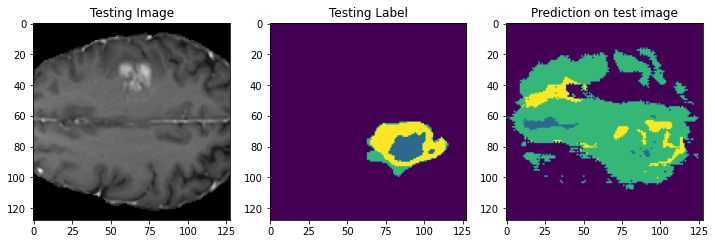

In [132]:
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 90
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()